# Load the Data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [3]:
data = pd.read_csv("state_trade_estimates.csv")

data.head(10)

,Commodity,State,Units,Year,Value,Unnamed: 5
0,Beef and veal,Alabama,Million dollars,2000,38.824952,NaN
1,Beef and veal,Alabama,Million dollars,2001,30.469775,NaN
2,Beef and veal,Alabama,Million dollars,2002,25.716640,NaN
3,Beef and veal,Alabama,Million dollars,2003,36.216064,NaN
4,Beef and veal,Alabama,Million dollars,2004,7.992460,NaN
5,Beef and veal,Alabama,Million dollars,2005,12.934546,NaN
6,Beef and veal,Alabama,Million dollars,2006,16.840427,NaN
7,Beef and veal,Alabama,Million dollars,2007,21.449331,NaN
8,Beef and veal,Alabama,Million dollars,2008,21.906768,NaN
9,Beef and veal,Alabama,Million dollars,2009,21.194072,NaN


In [4]:
data.tail(10)

,Commodity,State,Units,Year,Value,Unnamed: 5
31661,Wheat,Wyoming,Million dollars,2013,13.800064,NaN
31662,Wheat,Wyoming,Million dollars,2014,15.896352,NaN
31663,Wheat,Wyoming,Million dollars,2015,10.926659,NaN
31664,Wheat,Wyoming,Million dollars,2016,8.860259,NaN
31665,Wheat,Wyoming,Million dollars,2017,8.763646,NaN
31666,Wheat,Wyoming,Million dollars,2018,9.157541,NaN
31667,Wheat,Wyoming,Million dollars,2019,13.000796,NaN
31668,Wheat,Wyoming,Million dollars,2020,9.714292,NaN
31669,Wheat,Wyoming,Million dollars,2021,11.642463,NaN
31670,Wheat,Wyoming,Million dollars,2022,9.878842,NaN


In [5]:
data.dtypes

Commodity      object
State          object
Units          object
Year            int64
Value         float64
Unnamed: 5    float64
dtype: object

In [6]:
data.shape

(31671, 6)

In [7]:
print("Number of Rows", data.shape[0])
print("Number of Columns", data.shape[1])

Number of Rows 31671
Number of Columns 6


# Data Cleaning 

In [9]:
data.info

<bound method DataFrame.info of            Commodity    State            Units  Year      Value  Unnamed: 5
0      Beef and veal  Alabama  Million dollars  2000  38.824952         NaN
1      Beef and veal  Alabama  Million dollars  2001  30.469775         NaN
2      Beef and veal  Alabama  Million dollars  2002  25.716640         NaN
3      Beef and veal  Alabama  Million dollars  2003  36.216064         NaN
4      Beef and veal  Alabama  Million dollars  2004   7.992460         NaN
...              ...      ...              ...   ...        ...         ...
31666          Wheat  Wyoming  Million dollars  2018   9.157541         NaN
31667          Wheat  Wyoming  Million dollars  2019  13.000796         NaN
31668          Wheat  Wyoming  Million dollars  2020   9.714292         NaN
31669          Wheat  Wyoming  Million dollars  2021  11.642463         NaN
31670          Wheat  Wyoming  Million dollars  2022   9.878842         NaN

[31671 rows x 6 columns]>

In [10]:
# Checking the missing values in dataset

print("Missing value?", data.isnull().values.any())

Missing value? True


In [11]:
data.isnull().sum()

Commodity         0
State             0
Units             0
Year              0
Value             0
Unnamed: 5    31671
dtype: int64

In [12]:
# Finding the % of missing value by creating variable 
per_missing = data.isnull().sum() * 100 / len(data)

per_missing

Commodity       0.0
State           0.0
Units           0.0
Year            0.0
Value           0.0
Unnamed: 5    100.0
dtype: float64

In [13]:
# Droping the column 
data.drop('Unnamed: 5', axis=1, inplace=True)


In [14]:
# Check for the Duplicate Data
data.duplicated().any() # Since the data does not contain any duplicate value

False

In [15]:
# Overall statistics of DataFrame of the dataset
data.describe()

,Year,Value
count,31671.000000,31671.000000
mean,2011.000000,493.489651
std,6.633354,4349.105694
min,2000.000000,0.000000
25%,2005.000000,0.377521
50%,2011.000000,19.722151
75%,2017.000000,121.351407
max,2022.000000,188857.174000


In [16]:
# Group by Commodity and Year and calculate the sum of values
grouped_data = data.groupby(['Commodity', 'Year'])['Value'].sum().reset_index()

print(grouped_data)

         Commodity  Year         Value
0    Beef and veal  2000   7229.222000
1    Beef and veal  2001   6809.318000
2    Beef and veal  2002   6407.780000
3    Beef and veal  2003   7711.284000
4    Beef and veal  2004   1615.440000
..             ...   ...           ...
616          Wheat  2018  10774.769990
617          Wheat  2019  12455.032000
618          Wheat  2020  12563.911999
619          Wheat  2021  14454.808000
620          Wheat  2022  16645.176000

[621 rows x 3 columns]


In [17]:
# Pivot table to show trends over years
pivot_table = data.pivot_table(values='Value', index='Year', columns='Commodity', aggfunc='sum')

pivot_table

Commodity,Beef and veal,Broiler meat,Corn,Cotton,Dairy products,Feeds and other feed grains,"Fruits, fresh","Fruits, processed",Grain products,Hides and skins,...,Soybeans,Tobacco,Total agricultural exports,Total animal products,Total plant products,Tree nuts,Vegetable oils,"Vegetables, fresh","Vegetables, processed",Wheat
Year,,,,,,,,,,,,,,,,,,,,,
2000,7229.222000,2970.766000,8938.432000,3870.356000,1934.186000,6511.768000,4159.048000,3819.782,3094.134000,3123.348,...,10516.238000,10433.592,110021.337999,23749.932000,86271.406000,2205.178,2647.380000,2468.242,3756.128000,6708.252000
2001,6809.318000,3609.868000,9003.450000,4431.300000,2167.580000,6998.452000,4249.302000,3736.158,3276.552000,3925.356,...,10805.134000,8006.432,112295.269999,25495.448000,86799.822000,2270.324,2594.084000,2413.174,3633.964000,6703.012000
2002,6407.780000,2774.882000,9690.502000,4146.068000,1873.972000,6422.638000,4268.060000,3761.674,3569.492000,3490.526,...,11354.308000,5999.794,109786.378000,22951.068000,86835.310001,2616.692,3384.350000,2507.854,3551.564000,7223.202000
2003,7711.284000,2989.426000,9448.140000,6860.532000,2006.500000,6591.594000,4546.464000,4022.184,3947.528000,3563.978,...,15919.844000,5763.990,122196.438001,24975.960000,97220.478000,3234.876,3509.330000,2649.296,3462.382000,7831.412000
2004,1615.440000,3481.588000,11750.828000,8661.710000,2905.168000,6462.946000,4788.144000,4557.290,4404.142000,3489.956,...,13335.031999,5221.326,125667.035998,21413.180000,104253.856002,4052.336,3457.602000,2773.702,3725.352000,10187.536000
2005,2754.380000,4232.404000,9577.650000,8046.932000,3224.358000,6819.728000,5393.190000,4411.736,4917.548000,3553.268,...,12547.286001,4582.844,128745.546002,25087.931999,103657.613998,5453.370,3508.806000,3090.382,4051.344000,8714.778000
2006,4062.716000,3699.116000,13983.404000,9305.606000,3689.852000,7627.126000,5741.590000,5308.168,5488.356000,4090.994,...,13871.112000,4923.314,144654.819999,27863.278000,116791.542000,5735.398,3976.510000,3378.462,4447.306000,8389.072000
2007,5247.262000,5476.446000,19525.144000,9462.424000,5978.840000,9729.882000,6280.016000,5978.444,6586.052000,4331.838,...,19984.212000,4660.242,182548.558007,35514.770000,147033.788003,6117.706,5534.546000,3630.884,4983.000000,16729.301999
2008,6391.332000,7028.510000,26862.026000,9847.572000,7506.746000,12720.710000,7244.582000,6672.200,6536.158000,4128.234,...,30861.788000,4125.370,231434.588004,44047.084001,187387.504002,6805.280,8349.864000,3910.190,6337.306000,22580.565999


In [18]:
#Yearly Growth Rate Analysis
data['Growth_Rate'] = data.groupby('Commodity')['Value'].pct_change() * 100

print(data[['Year', 'Commodity', 'Value', 'Growth_Rate']])

       Year      Commodity      Value  Growth_Rate
0      2000  Beef and veal  38.824952          NaN
1      2001  Beef and veal  30.469775   -21.520122
2      2002  Beef and veal  25.716640   -15.599508
3      2003  Beef and veal  36.216064    40.827355
4      2004  Beef and veal   7.992460   -77.931173
...     ...            ...        ...          ...
31666  2018          Wheat   9.157541     4.494650
31667  2019          Wheat  13.000796    41.968195
31668  2020          Wheat   9.714292   -25.279254
31669  2021          Wheat  11.642463    19.848812
31670  2022          Wheat   9.878842   -15.148177

[31671 rows x 4 columns]


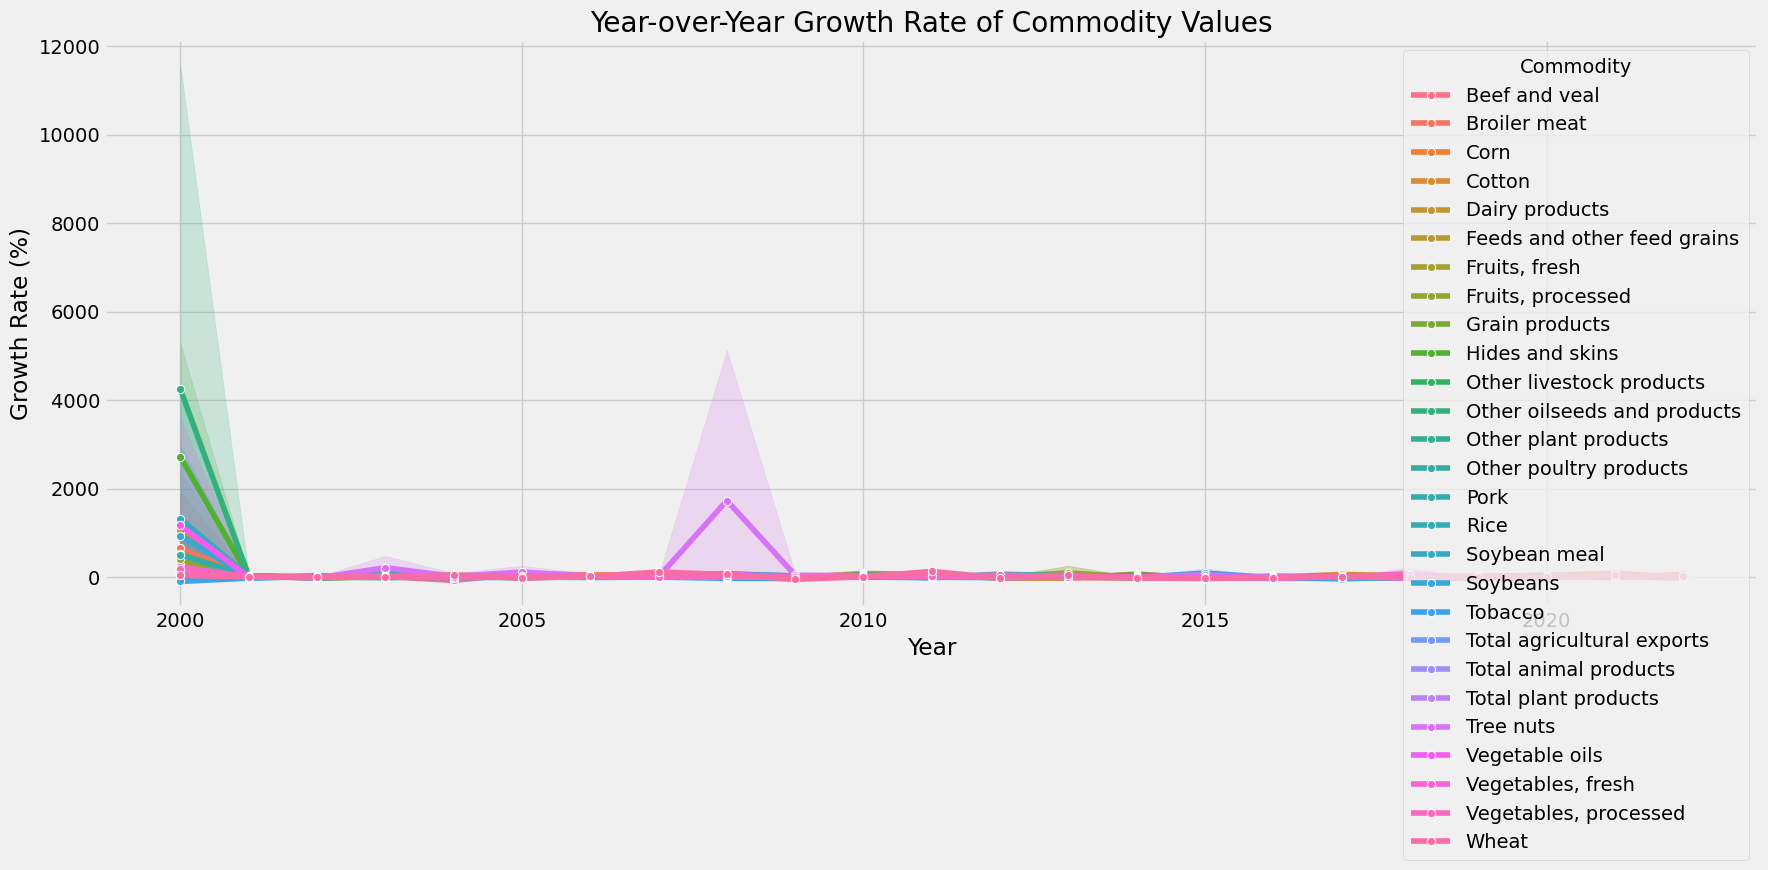

In [19]:
# Visualization 1: Plot the Growth Rate
plt.figure(figsize=(19, 7))
sns.lineplot(data=data, x='Year', y='Growth_Rate', hue='Commodity', marker='o')
plt.title('Year-over-Year Growth Rate of Commodity Values')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()

In [20]:
# Moving Average
data['Moving_Avg'] = data.groupby('Commodity')['Value'].rolling(window=3).mean().reset_index(level=0, drop=True)
print(data[['Year', 'Commodity', 'Value', 'Moving_Avg']])

       Year      Commodity      Value  Moving_Avg
0      2000  Beef and veal  38.824952         NaN
1      2001  Beef and veal  30.469775         NaN
2      2002  Beef and veal  25.716640   31.670456
3      2003  Beef and veal  36.216064   30.800826
4      2004  Beef and veal   7.992460   23.308388
...     ...            ...        ...         ...
31666  2018          Wheat   9.157541    8.927149
31667  2019          Wheat  13.000796   10.307328
31668  2020          Wheat   9.714292   10.624210
31669  2021          Wheat  11.642463   11.452517
31670  2022          Wheat   9.878842   10.411866

[31671 rows x 4 columns]


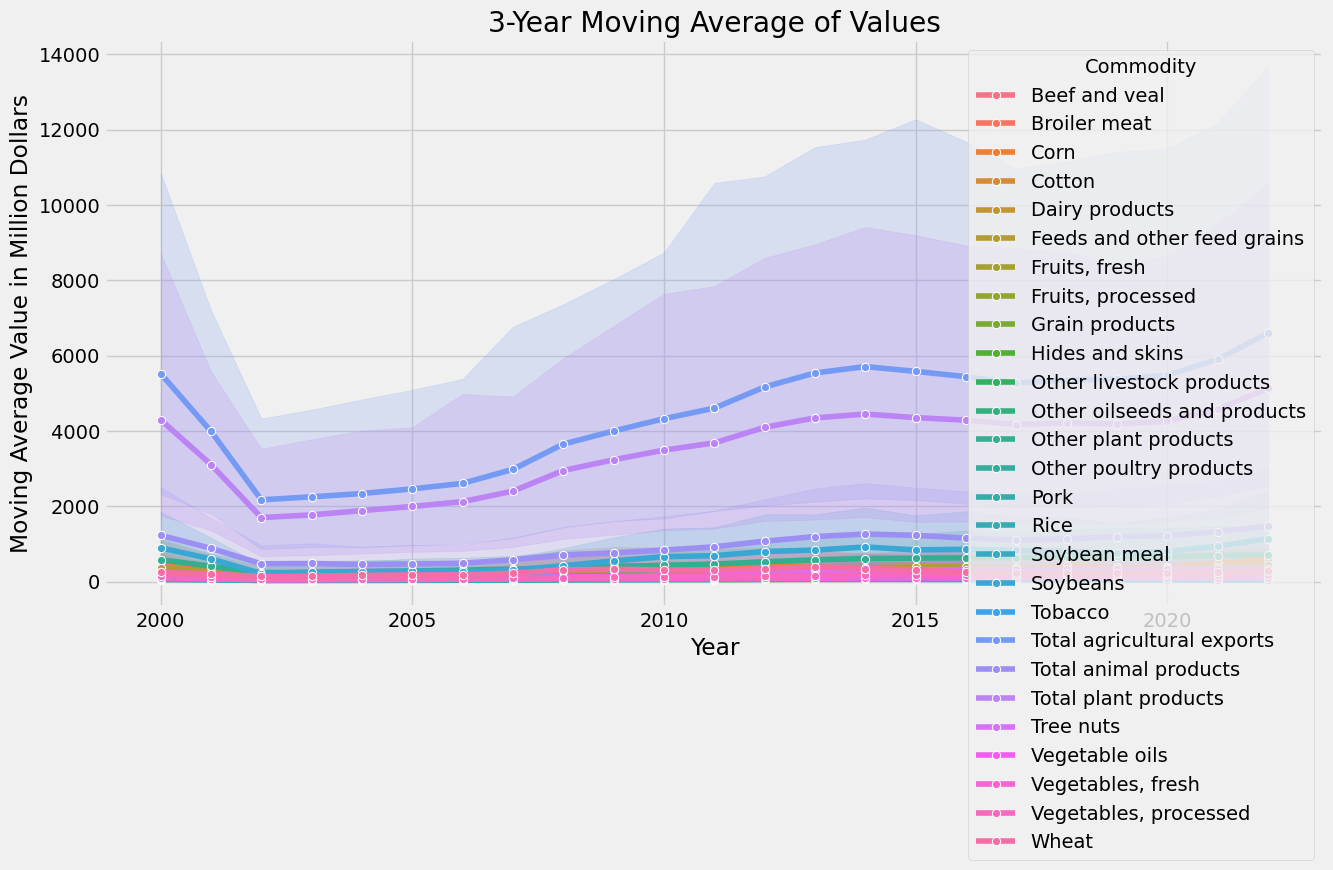

In [21]:
# Visualization 2: Visualize three years Moving Average
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Year', y='Moving_Avg', hue='Commodity', marker='o')
plt.title('3-Year Moving Average of Values')
plt.xlabel('Year')
plt.ylabel('Moving Average Value in Million Dollars')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()


C:\Users\PC34\AppData\Local\Temp\ipykernel_11960\3767641699.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Value', data=data, ci=None, estimator='mean', marker='o', color='blue')


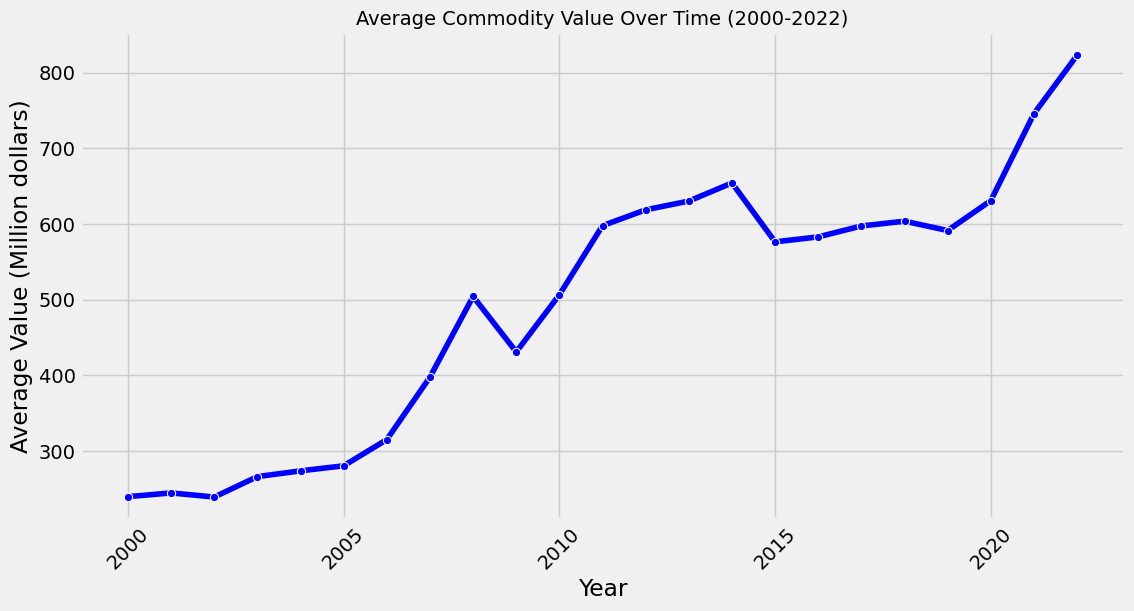

In [22]:
# Visualization 3: Time-series trend of the average commodity value over the years
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Value', data=data, ci=None, estimator='mean', marker='o', color='blue')
plt.title('Average Commodity Value Over Time (2000-2022)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Value (Million dollars)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

C:\Users\PC34\AppData\Local\Temp\ipykernel_11960\3204546636.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='State', data=top_states, palette='viridis')


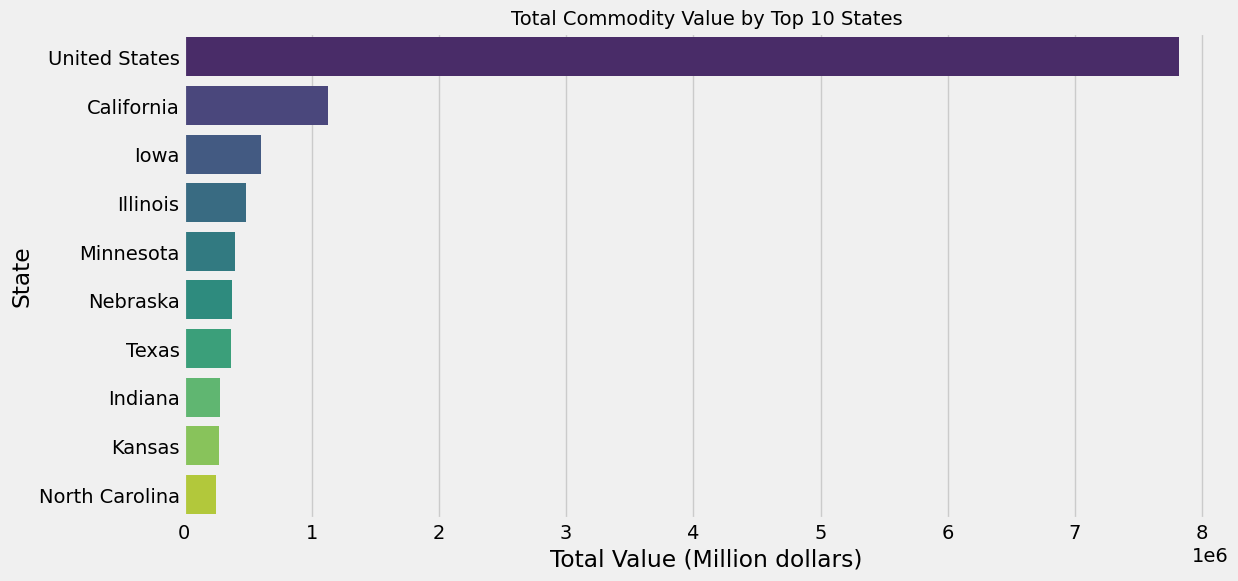

In [23]:
# Visualization 4: Total commodity value by top 10 states
top_states = data.groupby('State')['Value'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Value', y='State', data=top_states, palette='viridis')
plt.title('Total Commodity Value by Top 10 States', fontsize=14)
plt.xlabel('Total Value (Million dollars)')
plt.ylabel('State')
plt.show()

C:\Users\PC34\AppData\Local\Temp\ipykernel_11960\3844214793.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Commodity', data=top_commodities, palette='magma')


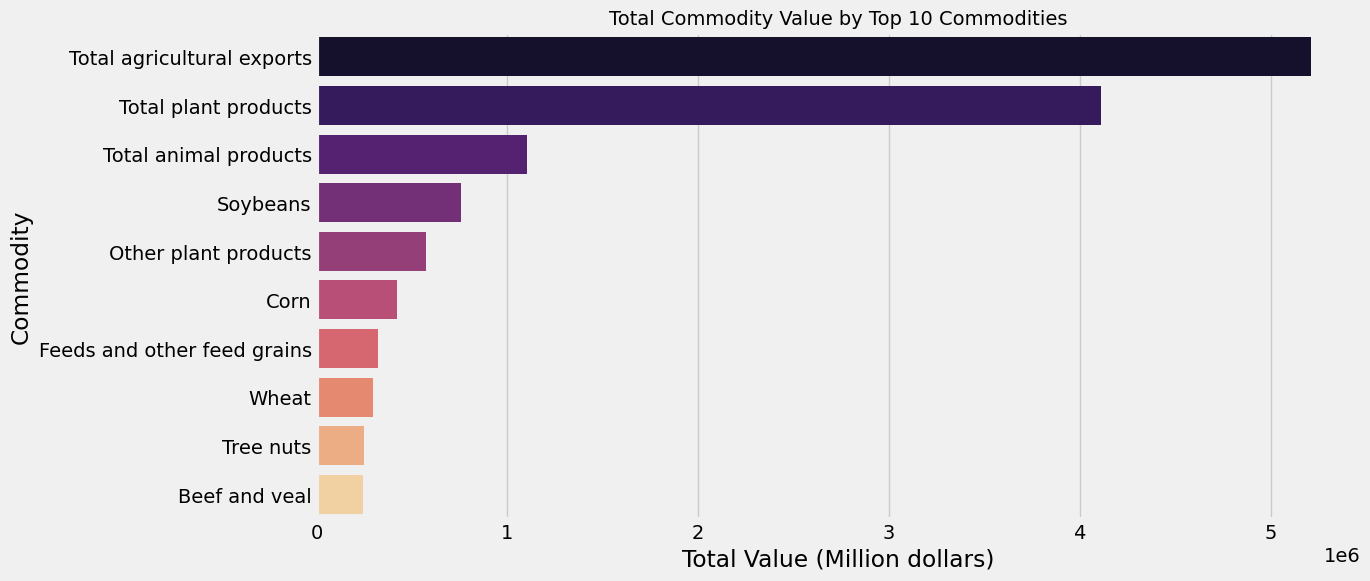

In [24]:
# Visualization 4: Total commodity value by top 10 commodities
top_commodities = data.groupby('Commodity')['Value'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Value', y='Commodity', data=top_commodities, palette='magma')
plt.title('Total Commodity Value by Top 10 Commodities', fontsize=14)
plt.xlabel('Total Value (Million dollars)')
plt.ylabel('Commodity')
plt.show()

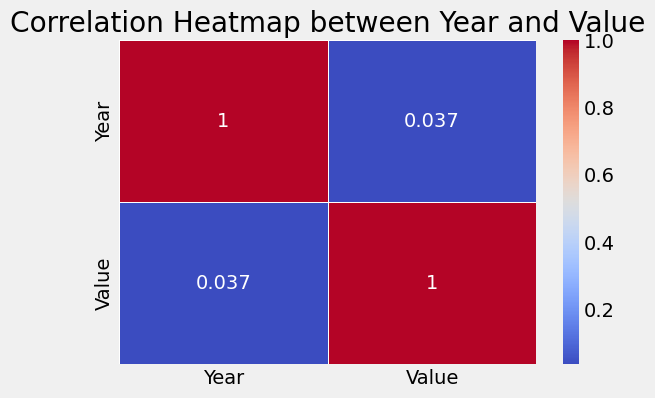

In [25]:
# Visualization 5: Heatmap of Correlations (although there are limited numerical features)
plt.figure(figsize=(6,4))
corr = data[['Year', 'Value']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Year and Value')
plt.show()

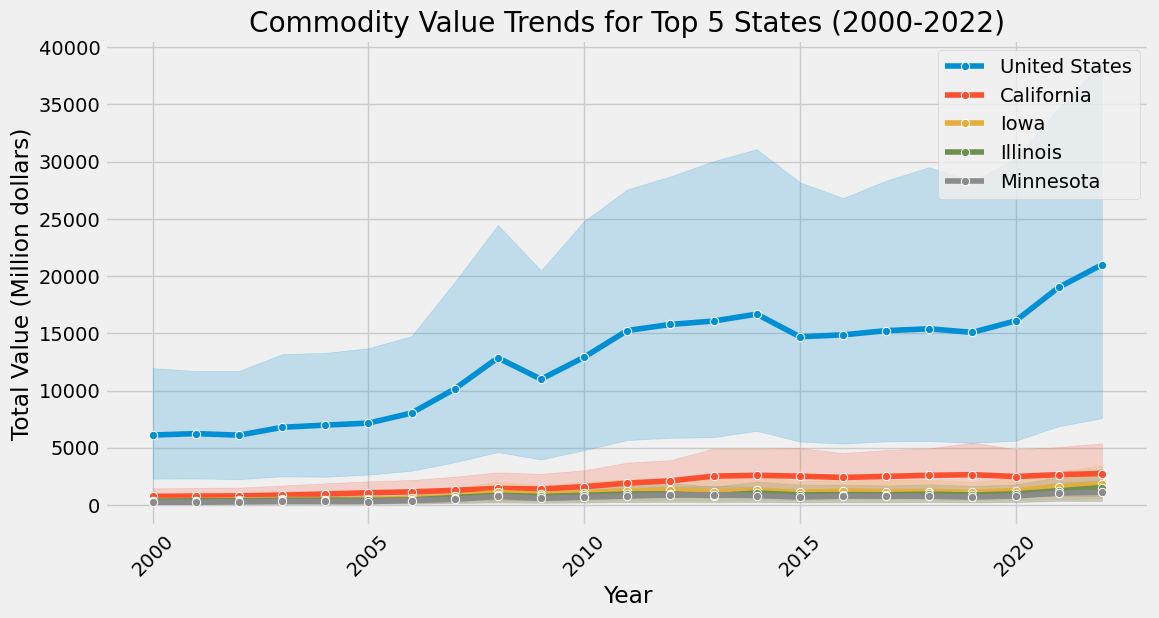

In [26]:
# Visualization 6: State-wise time-series trends for top 5 states (based on total commodity value)
top_5_states = data.groupby('State')['Value'].sum().nlargest(5).index
plt.figure(figsize=(12,6))
for state in top_5_states:
    state_data = data[data['State'] == state]
    sns.lineplot(x='Year', y='Value', data=state_data, label=state, marker='o')
plt.title('Commodity Value Trends for Top 5 States (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Total Value (Million dollars)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()